## Q1-2

In [1]:
## Q1-2
from transformers import BertTokenizer 

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
ids = tokenizer.encode('你好 hello word 3 127 959595959595')
print(tokenizer.decode(ids))
print(ids)   
print('')
print('959595959595 =>',[list(tokenizer.vocab)[idx] for idx in [13043, 9102, 9102, 9102, 9102]] )

[CLS] 你 好 hello word 3 127 959595959595 [SEP]
[101, 872, 1962, 8701, 8681, 124, 9274, 13043, 9102, 9102, 9102, 9102, 102]

959595959595 => ['9595', '##95', '##95', '##95', '##95']


## Q5-1

In [2]:
## Q5-1
from dataset import QA_dataset, DataLoader, subfinder

from transformers import BertTokenizer 

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
train_dataset = QA_dataset('/media/D/ADL2020-SPRING/A2/train.json', tokenizer)

length_samples = []
for idx,item in enumerate(train_dataset):
    if item[2]['text'] != '':
        leng = len(tokenizer.encode(item[2]['text'], add_special_tokens=False)) 
        length_samples.append(leng)
    
    if (idx+1)%100==0 or idx+1==len(train_dataset):
        print(f"\t[{idx+1}/{len(train_dataset)}] ", end='  \r')

#print(length_samples)


	[Info] Load QA_Dataset complete !! throw:972, remain:37508


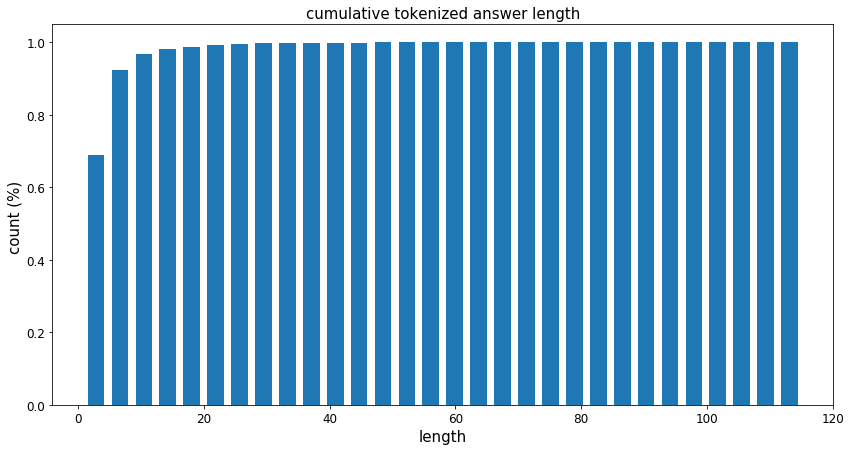

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,7))
plt.title('cumulative tokenized answer length', fontsize=15)
plt.hist(length_samples, cumulative=True, bins=30, rwidth=0.7, density=True)
plt.xlabel('length', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('count (%) ', fontsize=15)
plt.yticks(fontsize=12)
plt.show()


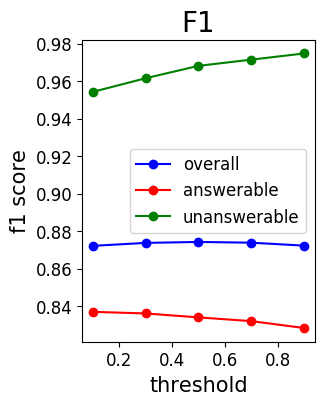

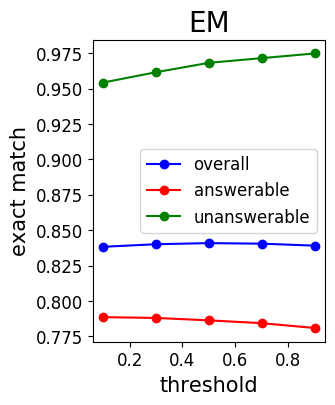

([0.1, 0.3, 0.5, 0.7, 0.9],
 'f1',
 {'overall': [0.8721098320844564,
   0.8736864129220623,
   0.8741965801485585,
   0.8737992817774818,
   0.872223331572211],
  'answerable': [0.8368901517347196,
   0.8360208293557492,
   0.8339119138671515,
   0.831925534752509,
   0.8282554628645029],
  'unanswerable': [0.9543046357615894,
   0.9615894039735099,
   0.9682119205298013,
   0.971523178807947,
   0.9748344370860927]},
 'em',
 {'overall': [0.8382995629717919,
   0.8400874056416369,
   0.8408820023837902,
   0.8404847040127136,
   0.8390941597139452],
  'answerable': [0.7885925085130534,
   0.7880249716231555,
   0.786322360953462,
   0.7843359818388195,
   0.7809307604994324],
  'unanswerable': [0.9543046357615894,
   0.9615894039735099,
   0.9682119205298013,
   0.971523178807947,
   0.9748344370860927]})

In [4]:
import glob, json

file = [(float(f[14:17]), f) for f in glob.glob('result/result_*.json')]
file = sorted(file)

data = []
for threshold, f_path in file:
    with open(f_path) as f:
        data.append((threshold, json.load(f)))

thresholds = [t for t,_ in data ]
f1 = {'overall':[], 'answerable':[], 'unanswerable':[]}
for thres, d in data:
    f1['overall'].append(d['overall']['f1'])
    f1['answerable'].append(d['answerable']['f1'])
    f1['unanswerable'].append(d['unanswerable']['f1'])
    
em = {'overall':[], 'answerable':[], 'unanswerable':[]}
for thres, d in data:
    em['overall'].append(d['overall']['em'])
    em['answerable'].append(d['answerable']['em'])
    em['unanswerable'].append(d['unanswerable']['em'])


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(3,4), dpi=100, linewidth=2)
#plt.subplot(1,2,1)
plt.title('F1', fontsize=20)
plt.plot(thresholds, f1['overall'], 'o-', color='b', label='overall')
plt.plot(thresholds, f1['answerable'], 'o-', color='r', label='answerable')
plt.plot(thresholds, f1['unanswerable'], 'o-', color='g', label='unanswerable')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("threshold", fontsize=15)
plt.ylabel("f1 score", fontsize=15)
plt.legend(loc = "best", fontsize=12)
plt.show()


plt.figure(figsize=(3,4), dpi=100, linewidth=2)
#plt.subplot(1,2,2)
plt.title('EM', fontsize=20)
plt.plot(thresholds, em['overall'], 'o-', color='b', label='overall')
plt.plot(thresholds, em['answerable'], 'o-', color='r', label='answerable')
plt.plot(thresholds, em['unanswerable'], 'o-', color='g', label='unanswerable')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("threshold", fontsize=15)#, labelpad = 12)
plt.ylabel("exact match", fontsize=15)#, labelpad = 12)
plt.legend(loc = "best", fontsize=12)
plt.show()

thresholds, 'f1', f1, 'em', em

In [5]:
import json

with open('result/predict.json') as f:
    data = json.load(f)

data


{'ee807557a886e8775242e561575818737c77880dae59e91a698598b0': '德國',
 '314e58ad0bd4ac6c0c73ad87f83a36560d6d78bc028864356b88f519': '梵語',
 '6ee8f450ae49a8c36ed1efb1cc5d15d92fd6ada456a1739934ca7d93': '威廉·瓊斯',
 '2bb5949c9612ff127b31b86a2746f359f756ad2697f1cd4a32e831ff': '',
 'e9d2ec04fad375aaf771faac1760d9dd4c040c7127e9ffcaaa581719': '梵語發展成俗語之後',
 '4aaf75c36bf4cca749b5e35193a3ddf25dd158abdc8cba249b1d8316': '19世紀晚期',
 '338808b7cd565984fb4803c04cfb518439b23542ff8ec99e7f7a288c': '天城文',
 '5b42e3f2daa3d7c938cedd7c87e0325195c081a4c49d8f28327dd4bc': '無頭化變體',
 'c347b913dc64da71f19a717d2b2e69c74b4d0a9397cb671ec5116861': '1991年',
 '19b0c3ea2d437c2e7c8bebe5a4c44fe0d824d871158aedd63c7573ce': '《蘇達爾摩》',
 '1be6494c75a6a875b38a35d469b7ec037a45228dd22dfd9ca0dac876': '馬祖列島',
 '9323b2b379191eb21e32a578239fa25fee3626ae5b8d7698bf127a08': '交通部觀光局',
 '294cf4c5da3ae75e7ac0658e56631d3cf3cfa952a3062fc9b1f7d029': '2000年6月',
 '3ea85bac73d5a4c90dbb39967af088dc720da8a1f330437c40e18d74': '白犬列島',
 '627fa2952d2f2c9a26a031db

In [6]:
import torch

torch.softmax(torch.tensor([[float("-inf"),float("-inf"),1]]),dim=1)

tensor([[0., 0., 1.]])

# Dataset

In [7]:
from dataset import QA_dataset, DataLoader, subfinder

# Model

In [8]:
from model import Model

# Train

In [9]:
from train import train

# Test

import json 

from torch.utils.data import Dataset, DataLoader 

class QA_test_dataset(Dataset):
    def __init__(self, test_json, tokenizer):
        with open(test_json) as f:
            data = json.load(f)['data']
            
        self.tokenizer = tokenizer

        self.data = {'uid':[],
                     'context':[],
                     'question':[],
                    }

        for class_data in data:
            for paragraph in class_data['paragraphs']:
                context = paragraph['context']
                for qa in paragraph['qas']:    
                    self.data['context'].append(context)
                    self.data['question'].append(qa['question'])
                    self.data['uid'].append(qa['id'])
                    
        print(f'\t[Info] Load QA_test_dataset complete !! total:{self.__len__()}')
        
    def __len__(self):
        assert len(self.data['context'])==\
               len(self.data['question'])
        return len(self.data['question'])     
    
    def pad_to_len(self, context_ids, question_ids, length=512):
        PAD_ID = self.tokenizer.pad_token_id
        
        to_len = min(length-len(question_ids), len(context_ids))
        output_ids = context_ids[:to_len]
        output_ids += question_ids[1:]
        output_ids += [PAD_ID] * (length-len(output_ids))
        
        mask = [False] + [True]*(to_len-1) + [False]*(len(output_ids)-to_len)
        
        return output_ids, mask
 
    def __getitem__(self, idx):
        context  = self.data['context'][idx]
        question = self.data['question'][idx]
        uid = self.data['uid'][idx]
        
        context_ids  = self.tokenizer.encode(context, max_length=512)
        question_ids = self.tokenizer.encode(question, max_length=512)
        
        input_ids, mask = self.pad_to_len(context_ids, question_ids)
        
        return (context, question, uid, 
                input_ids)
            
    def collate_fn(self, samples):
        tokenizer = self.tokenizer
        
        batch_context = []
        batch_question = []
        batch_uid = []
        
        batch_input = []
        
        for sample in samples:
            context, question, uid, input_ids = sample
            
            batch_context.append(context)
            batch_question.append(question)
            batch_uid.append(uid)
            
            batch_input.append(input_ids)
            
        return (batch_context,
                batch_question,
                batch_uid,
                torch.tensor(batch_input))    


In [10]:
from dataset import QA_test_dataset, DataLoader 
from model import Model

import os, json, torch, warnings, argparse
from transformers import BertTokenizer 

def parse_args(string=None):
    parser =  argparse.ArgumentParser()
    parser.add_argument('--test-json', default='/media/D/ADL2020-SPRING/A2/dev.json',
                        type=str, help='path of DRV dataset')
    parser.add_argument('--load-model-path', default='trained_model/epoch_0_model_loss_0.3706.pt',
                        type=str, help='load Model path')
    parser.add_argument('--write-file', default='result/predict.json',
                        type=str, help='output submition file')
    parser.add_argument('--num-workers', default=6,
                       type=int, help='Dataloader num of workers')
    parser.add_argument('--gpu', default="0",
                        type=str, help='training gpu ex:0,1,2')
    parser.add_argument('--batch-size', default=64,
                        type=int, help='batch size')
    args = parser.parse_args() if string is None else parser.parse_args(string.split())
    return args

def inference(args, dataloader):
    
    model = Model()
    model.load_state_dict(torch.load(args.load_model_path)['state_dict'])
    model.eval().cuda()

    with torch.no_grad():
        result = {}

        for index, (context, question, uids, _input) in enumerate(dataloader):
            b = _input.size(0)

            output_ansable, output_start, output_end = model(_input.cuda())

            ansable = (torch.sigmoid(output_ansable.cpu())>0.5)

            start = torch.argmax(output_start.cpu(), dim=1)
            end = torch.argmax(output_end.cpu(), dim=1)

            for idx, (uid, ans) in enumerate(zip(uids,ansable)):
                if ans > 0.5:
                    (s,e) = start[idx],end[idx]
                    (s,e) = (s,e) if e>s else (e,s)
                    _answer = tokenizer.decode(_input[idx][s:e].numpy(),
                                               skip_special_tokens=True)
                    result[uid] = _answer = _answer.replace(' ','')
                else:
                    result[uid] = ""

            print("\t[{}/{}] ".format(index*args.batch_size+b, 
                        len(dataloader.dataset)), end='  \r')

        with open(args.write_file, 'w') as f:
            f.write(str(json.dumps(result)))
            
        print("\t[Info] fininsh inference ! ")

if __name__ == '__main__':
    
    args = parse_args('')
    
    os.environ['CUDA_VISIBLE_DEVICES'] = "1" # 0:1080ti 1:1070
    warnings.filterwarnings('ignore')

    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    test_dataset = QA_test_dataset(args.test_json, tokenizer)

    test_dataloader = DataLoader(test_dataset,
                                 batch_size=args.batch_size,
                                 collate_fn=test_dataset.collate_fn,
                                 shuffle=False)

    #inference(args, test_dataloader)


	[Info] Load QA_test_dataset complete !! total:5034


## Calculate pos weight

In [11]:
import json

json_path = '/media/D/ADL2020-SPRING/A2/train.json'

with open(json_path) as f:
    datasets = json.load(f)['data']
    
total_count = 0
ansable_count = 0

for class_data in datasets:
    for paragraph in class_data['paragraphs']:
        context = paragraph['context']
        for qa in paragraph['qas']:
            if qa['answers'][0]['answer_start']>500:
                #print(' <too long>')
                #too_long += 1
                continue
                        
            if qa['answers'][0]['text']!='':
                ansable_count += 1                    
            total_count += 1

ansable_pos_weight = (total_count - ansable_count)/ansable_count
print('not ansable:{}, ansable:{}, pos weight:{} '.format(total_count-ansable_count,ansable_count, ansable_pos_weight))

not ansable:11544, ansable:25964, pos weight:0.44461562162994916 


# Main

#from train import train

import os, warnings, argparse
warnings.filterwarnings('ignore')

from transformers import BertTokenizer 
from dataset import QA_dataset, DataLoader

def parse_args(string=None):
    parser = argparse.ArgumentParser()
    parser.add_argument('--lr', default=1e-3,
                        type=float, help='leanring rate')
    parser.add_argument('--epoch', default=10,
                        type=int, help='epochs')
    parser.add_argument('--batch-size', default=16,
                        type=int, help='batch size')
    parser.add_argument('--gpu', default="1",
                        type=str, help="0:1080ti 1:1070")
    parser.add_argument('--num-workers', default=6,
                        type=int, help='dataloader num workers')
    parser.add_argument('--save-path', default='trained_model',
                        type=str, help='.pth model file save dir')
    
    args = parser.parse_args() if string is None else parser.parse_args(string)
    if not os.path.exists(args.save_path): os.makedirs(args.save_path)
    return args

if __name__=='__main__':
    args = parse_args('')
    
    os.environ['CUDA_VISIBLE_DEVICES'] = args.gpu #0:1080ti 1:1070
    
    ## load tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
    
    ## load dataset
    train_dataset = QA_dataset('/media/D/ADL2020-SPRING/A2/train.json', tokenizer)
    valid_dataset = QA_dataset('/media/D/ADL2020-SPRING/A2/dev.json', tokenizer)

    train_dataloader = DataLoader(train_dataset, 
                                  batch_size = args.batch_size,
                                  num_workers = args.num_workers,
                                  collate_fn = train_dataset.collate_fn,
                                  shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, 
                                  batch_size = args.batch_size*4,
                                  num_workers = args.num_workers,
                                  collate_fn = valid_dataset.collate_fn )
    
    ## train
    train(args, train_dataloader, valid_dataloader)    
